# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

%matplotlib inline

### read dataset

In [2]:
titanic = pd.read_csv('titanic_train.csv')

### simple feature engineering

#### impute null values

In [3]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

#### handle categrical features

In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

#### features to used

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

## Test XGBoost with PDPbox

In [6]:
clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(titanic[features], titanic['Survived'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
       colsample_bytree=0.85, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85)

In [7]:
from pdpbox import pdp

## Binary feature: Sex

### target plot

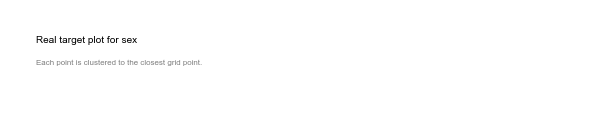

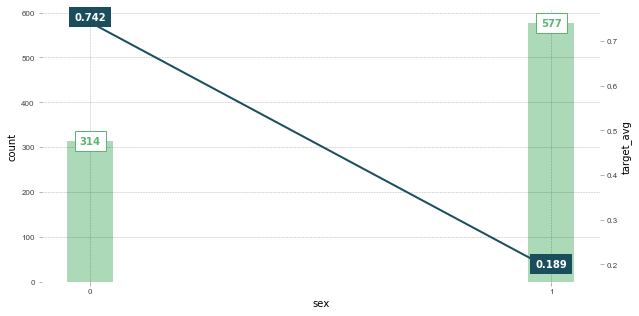

In [9]:
pdp.target_plot(titanic, 'Sex', 'sex', 'Survived', figsize=(10, 5))

### calculate the pdp object

In [10]:
pdp_sex = pdp.pdp_isolate(clf, titanic[features], 'Sex')

#### simple pdp line with std

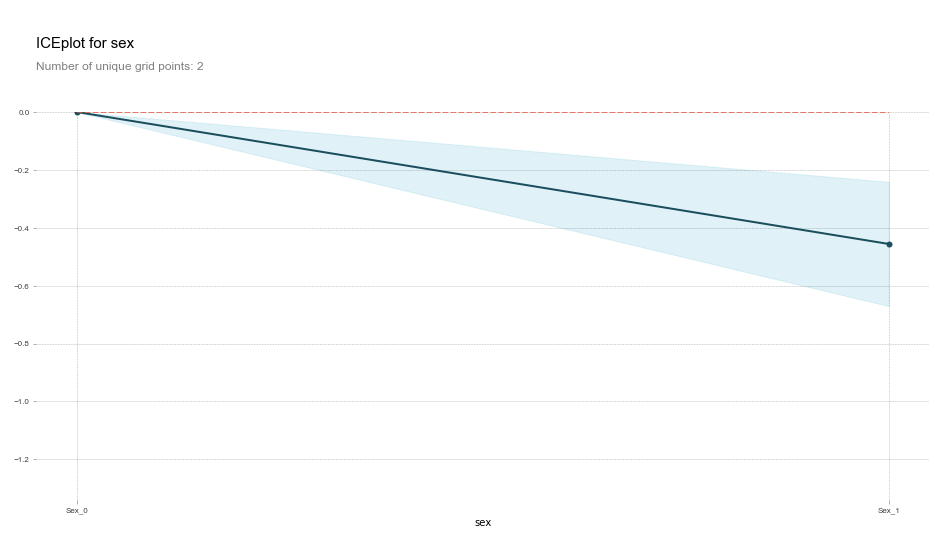

In [11]:
pdp.pdp_plot(pdp_sex, 'sex')

#### try to plot out the original points

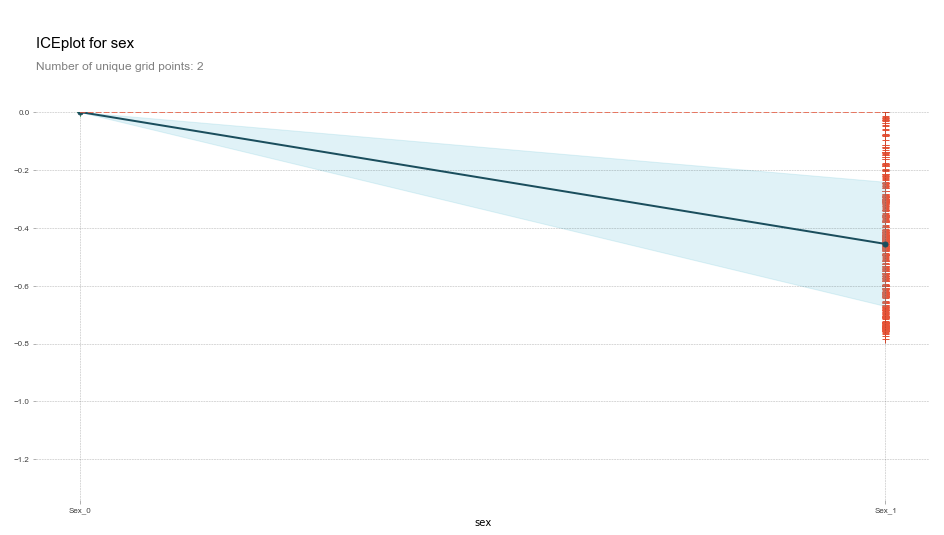

In [12]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True)

#### also plot out the individual conditional expectation lines

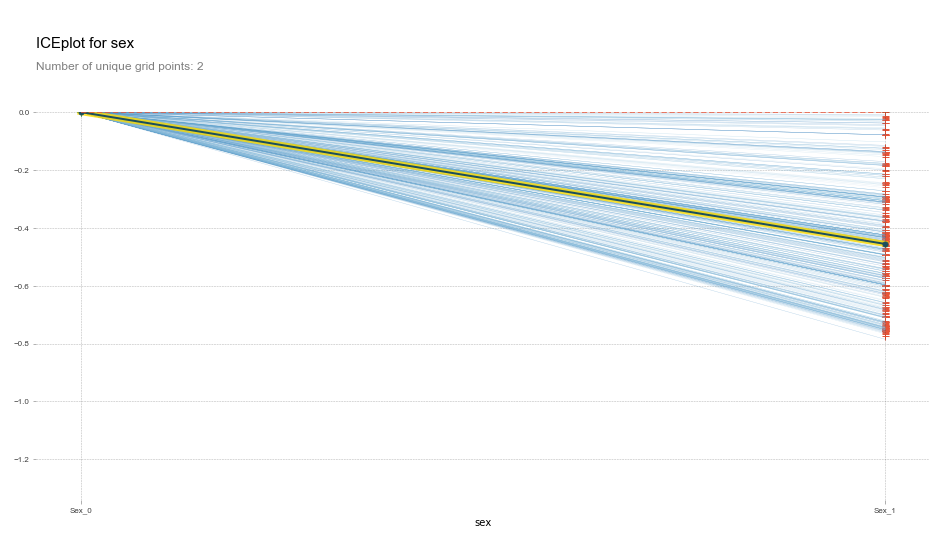

In [13]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### try to do clustering on all the individual conditional expectation lines

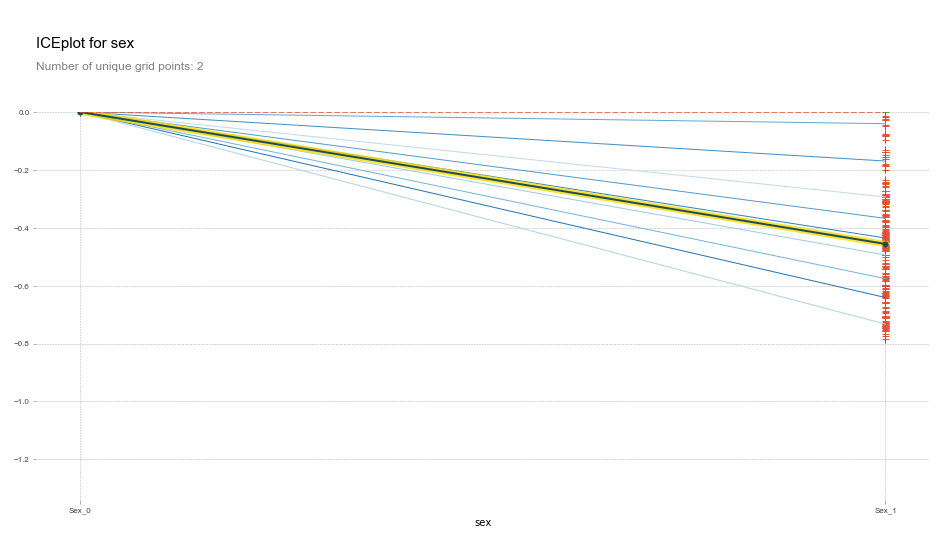

In [14]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, cluster=True, n_cluster_centers=10)

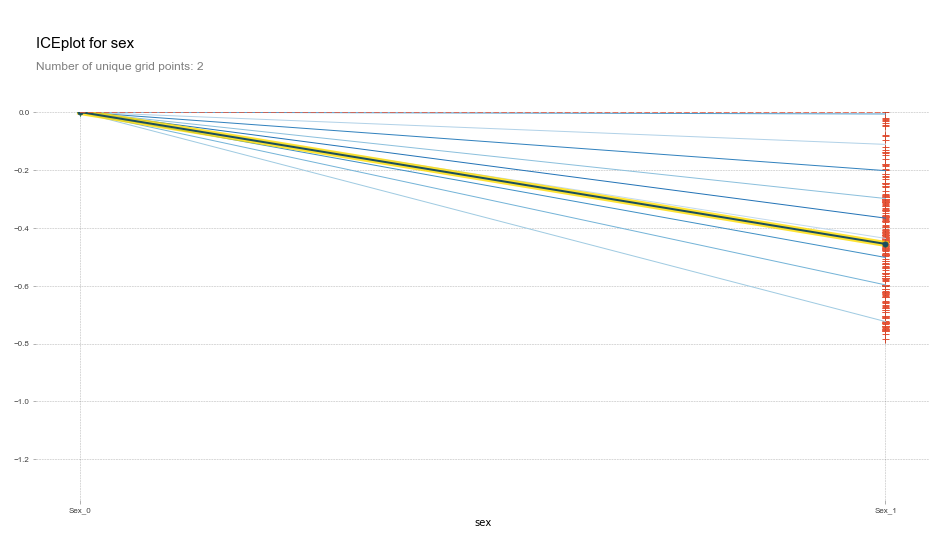

In [15]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, 
             cluster=True, n_cluster_centers=10, cluster_method='approx')

#### try to change the figure size

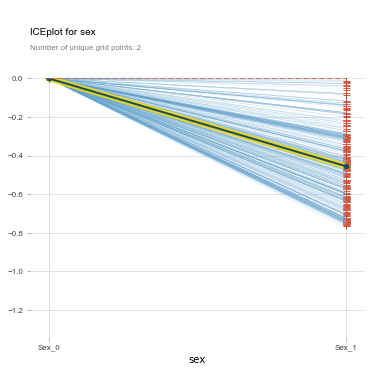

In [16]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, figsize=(6, 6))

#### try to customized the plot

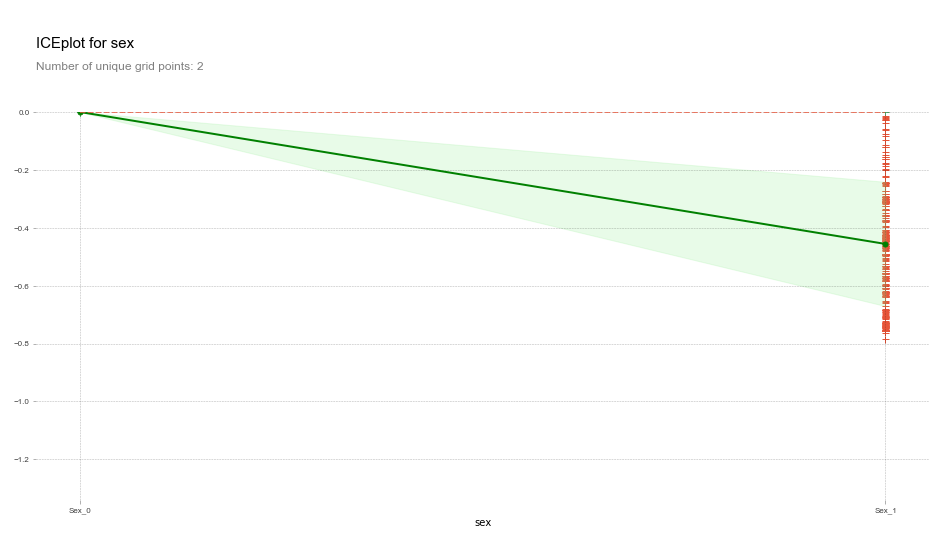

In [17]:
plot_params = {
    'pdp_color': 'green',
    'fill_color': 'lightgreen'
}
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, frac_to_plot=0.5, plot_params=plot_params)

#### try to plot out the actual predictions

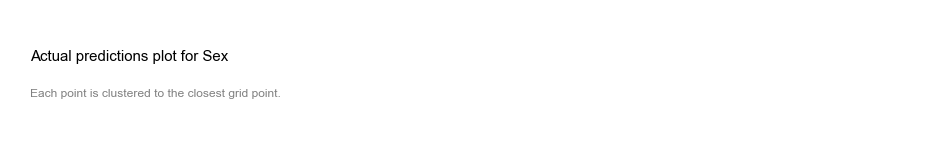

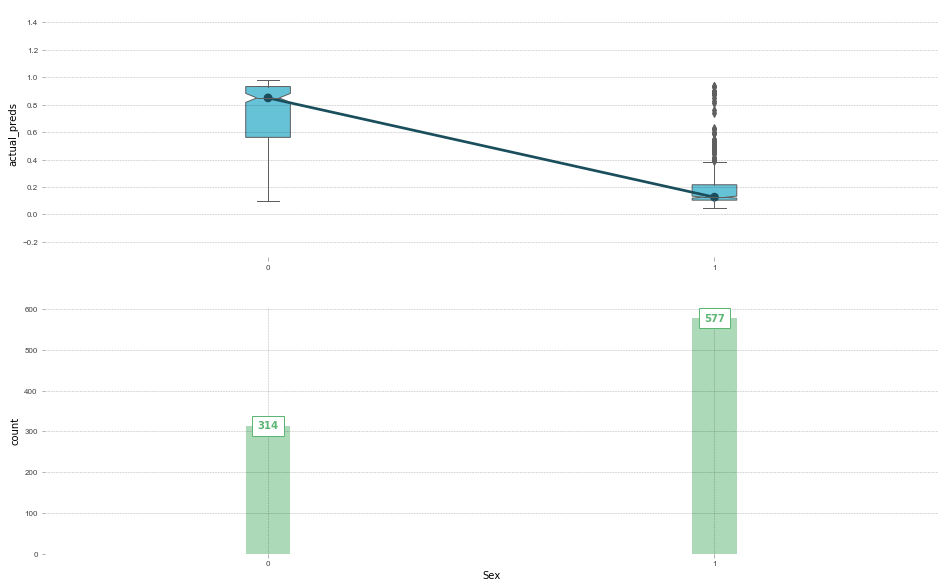

In [18]:
pdp.actual_plot(pdp_sex, 'Sex')

## one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

### target plot

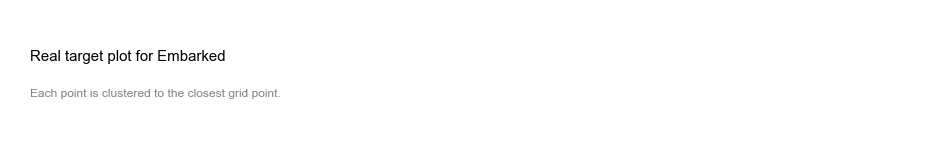

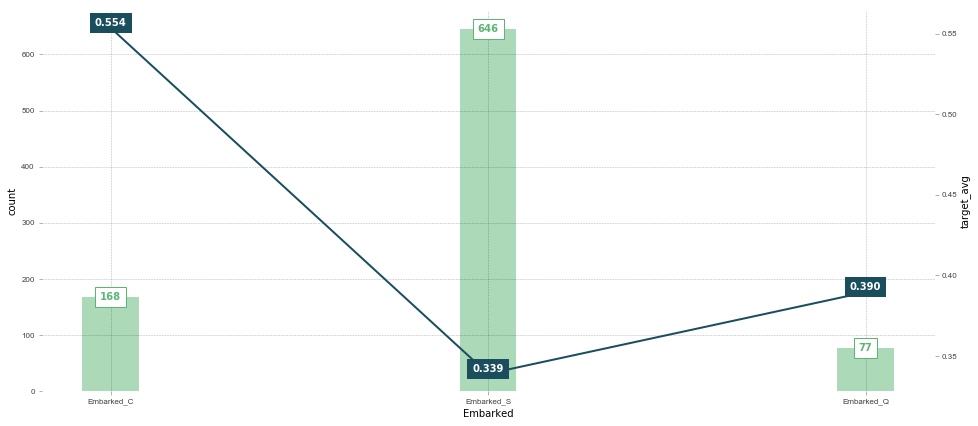

In [19]:
pdp.target_plot(titanic, ['Embarked_C', 'Embarked_S', 'Embarked_Q'], 'Embarked', 'Survived')

In [20]:
pdp_embark = pdp.pdp_isolate(clf, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

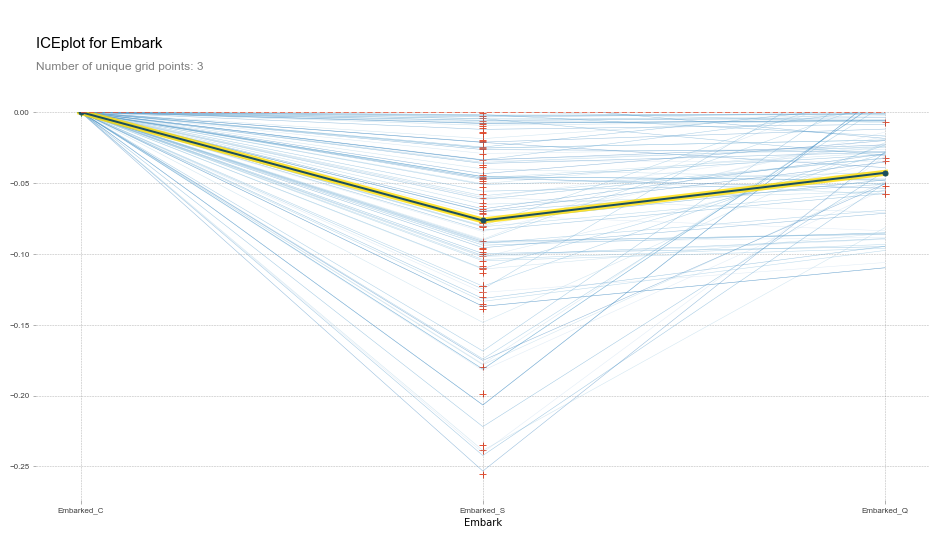

In [21]:
pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to set center=False, it's harder to tell the difference when the lines are not centered

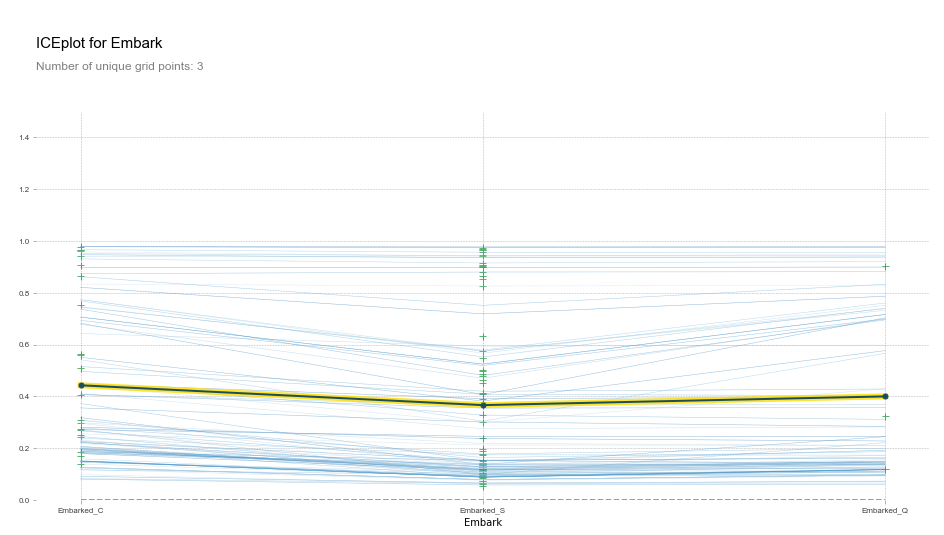

In [22]:
pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to plot out the actual predictions

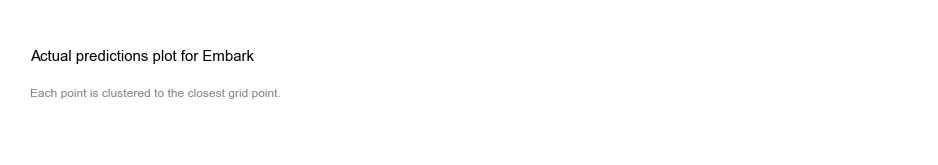

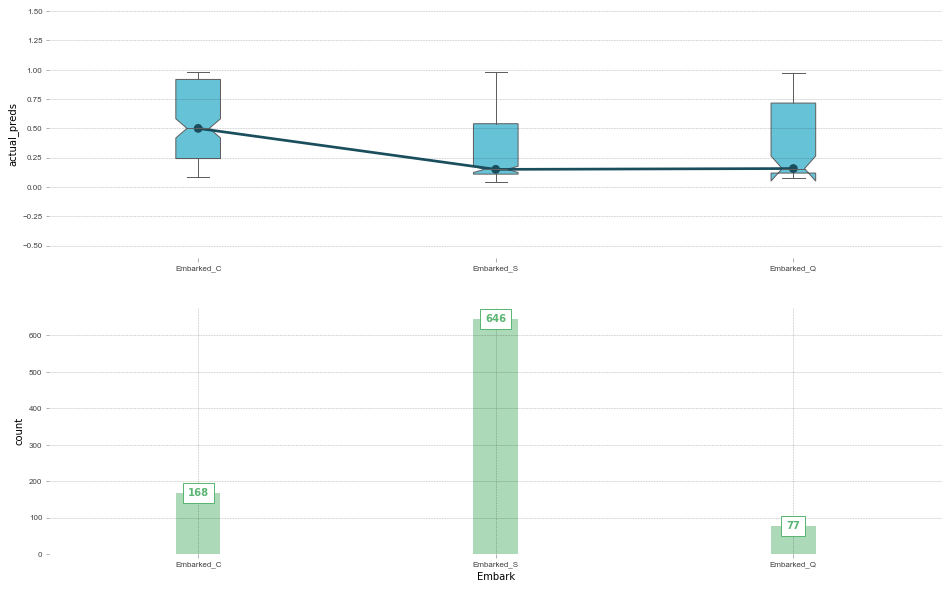

In [23]:
pdp.actual_plot(pdp_embark, 'Embark')

## numeric feature: fare

### target plot

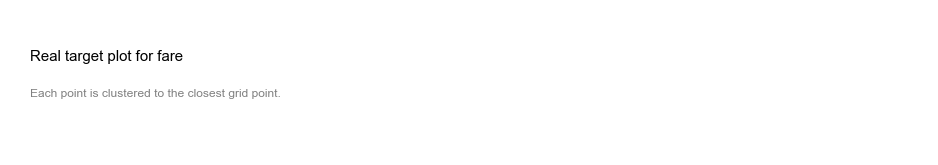

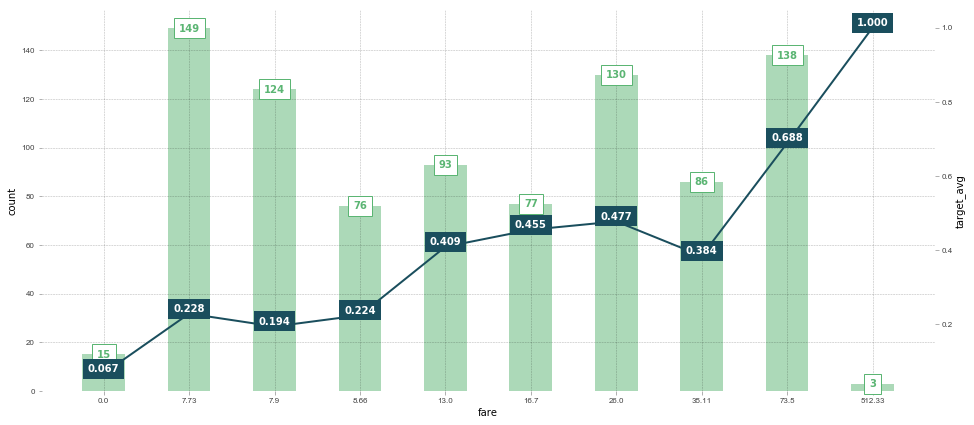

In [24]:
pdp.target_plot(titanic, 'Fare', 'fare', 'Survived')

In [25]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare')

#### try to plot out the actual predictions

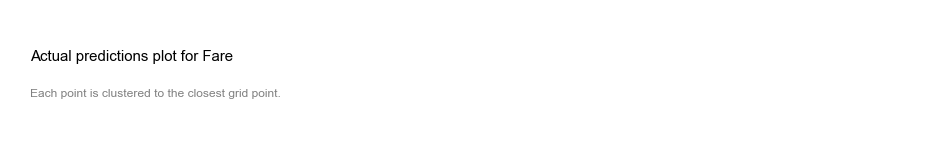

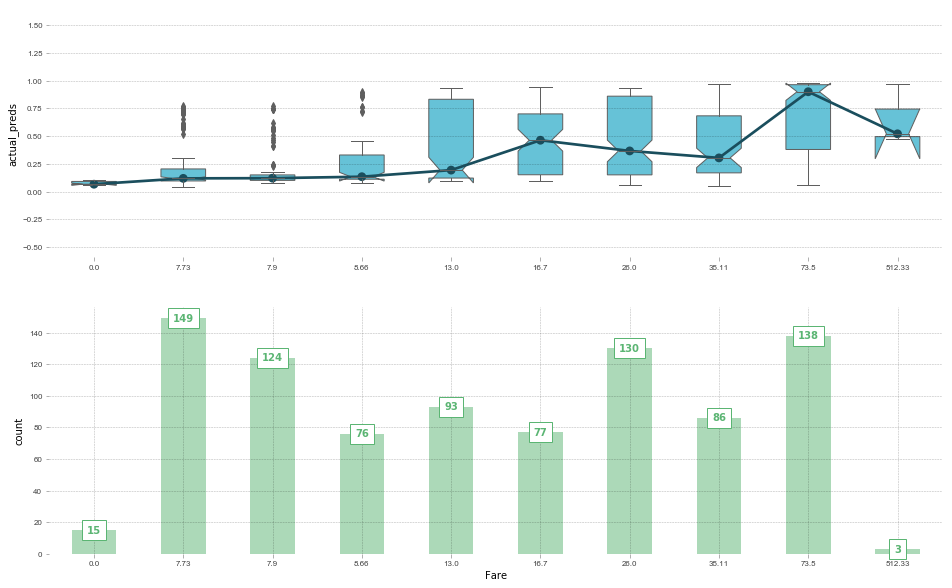

In [27]:
pdp.actual_plot(pdp_fare, 'Fare')

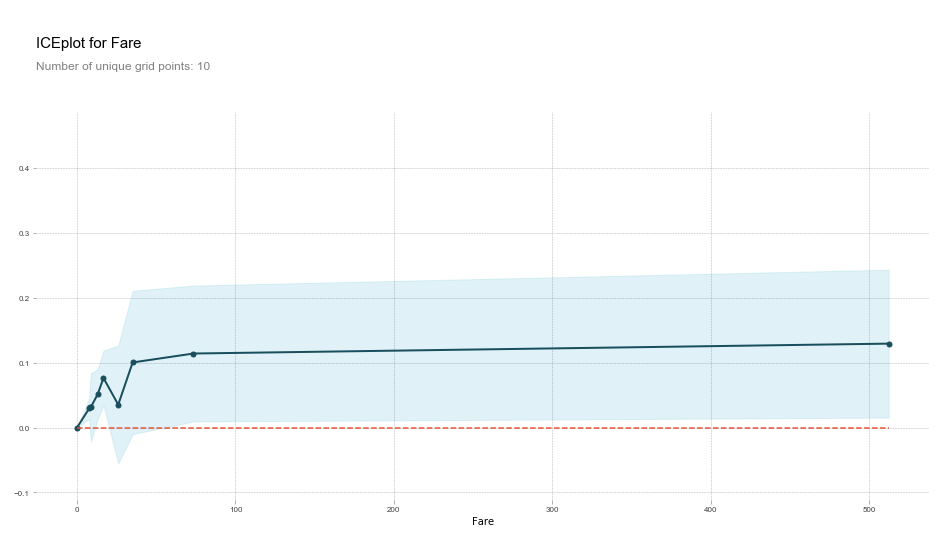

In [28]:
pdp.pdp_plot(pdp_fare, 'Fare')

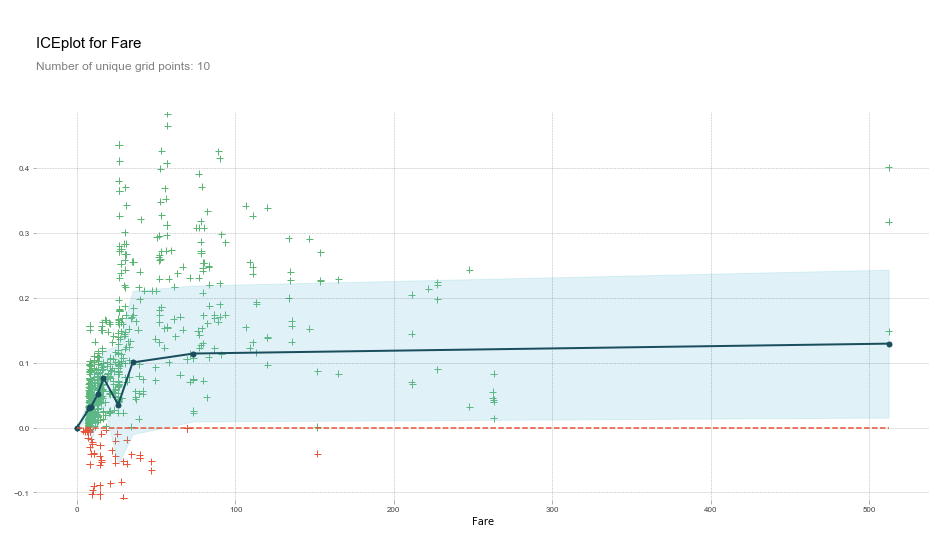

In [29]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True)

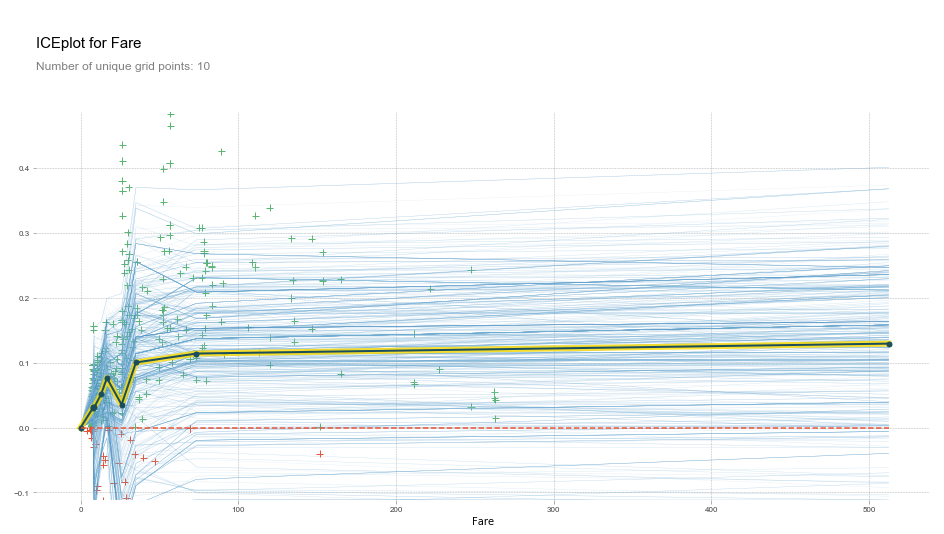

In [30]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=500)

#### for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points

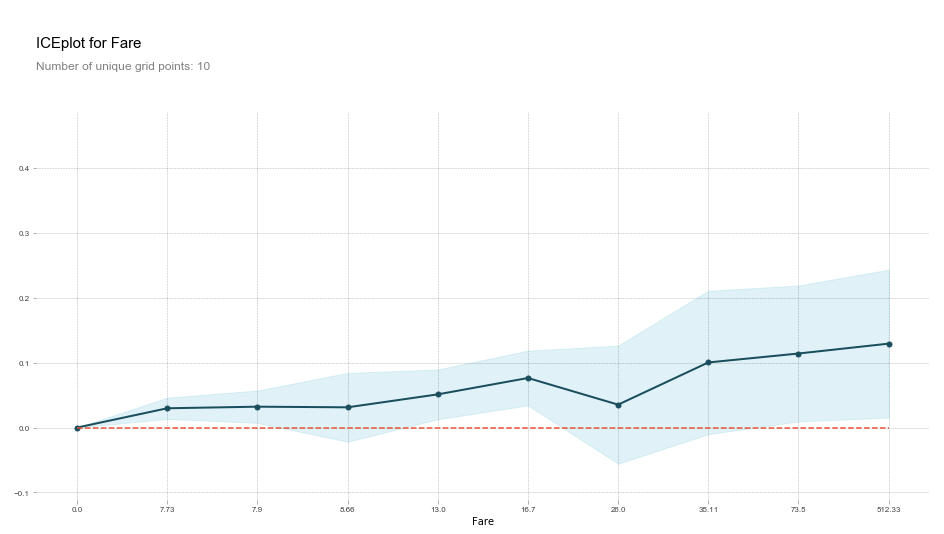

In [31]:
pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True)

#### under x_quantile=True mode, the origin points would be assign to their closest quantile

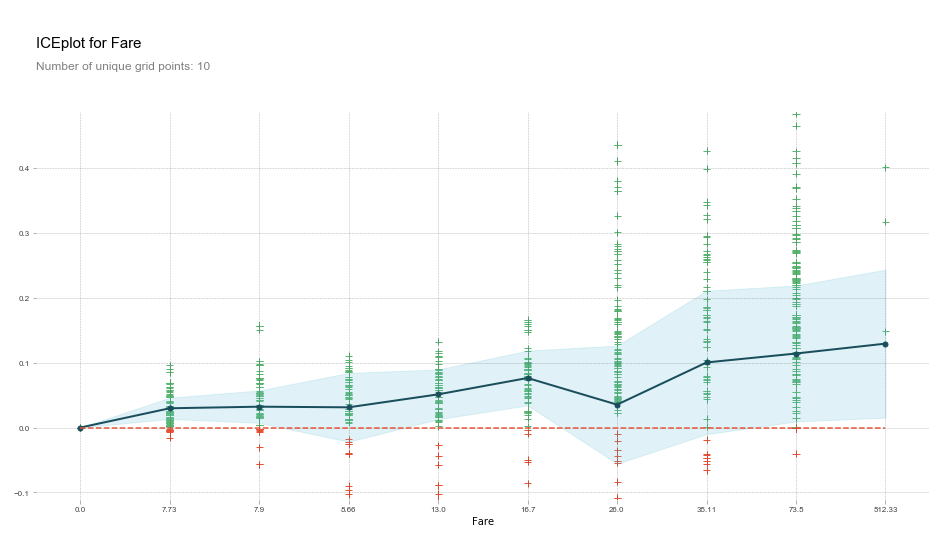

In [32]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, x_quantile=True)

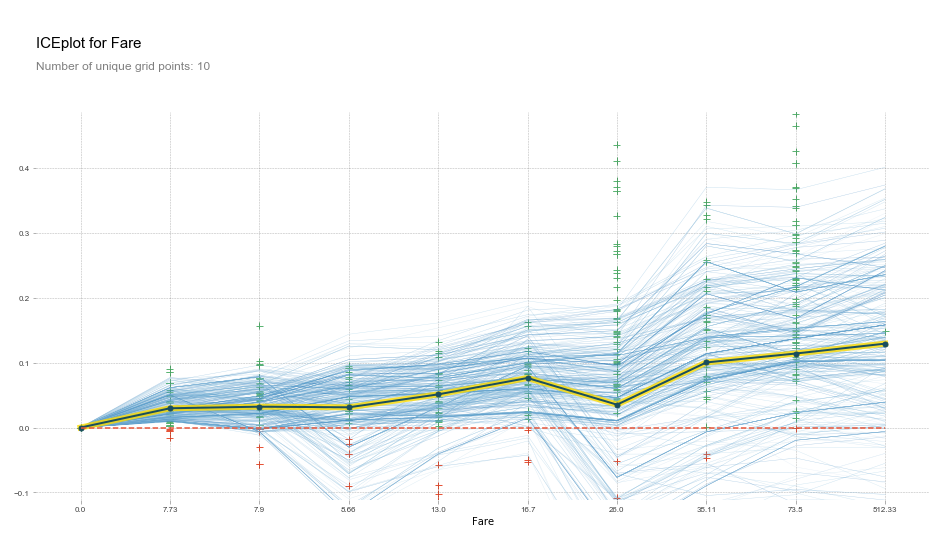

In [33]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also add more number of grid points for the numeric feature

In [34]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20)

#### try to plot out the actual predictions

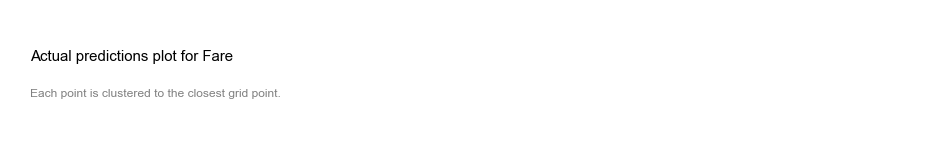

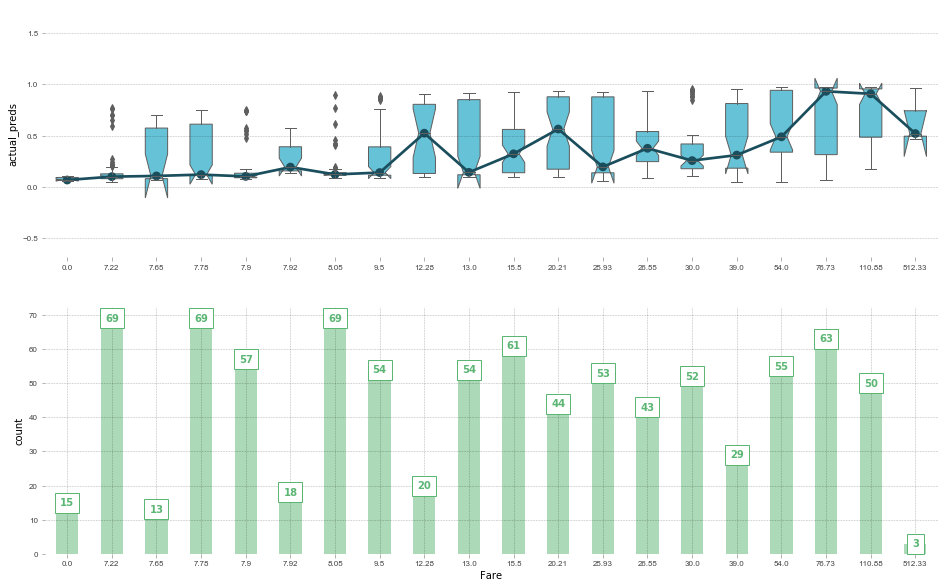

In [35]:
pdp.actual_plot(pdp_fare, 'Fare')

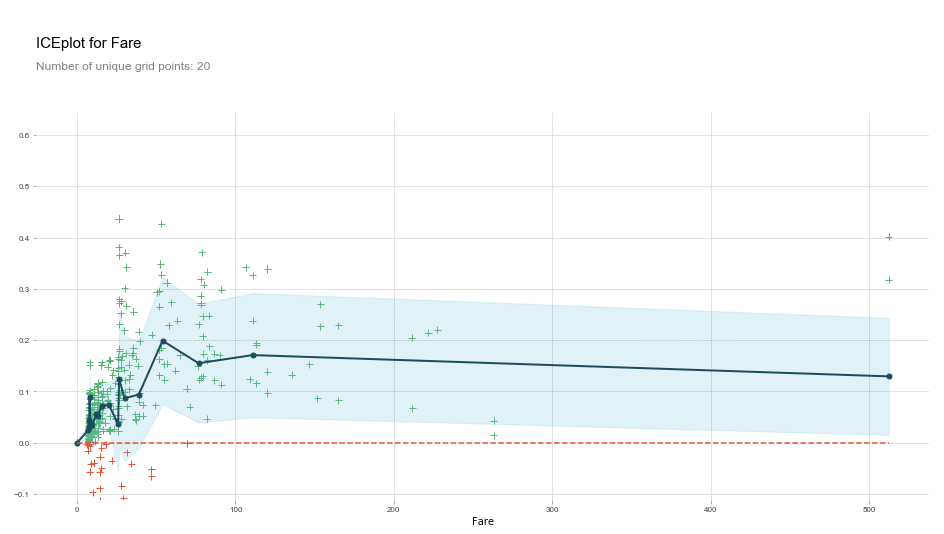

In [37]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### cluster all individual lines

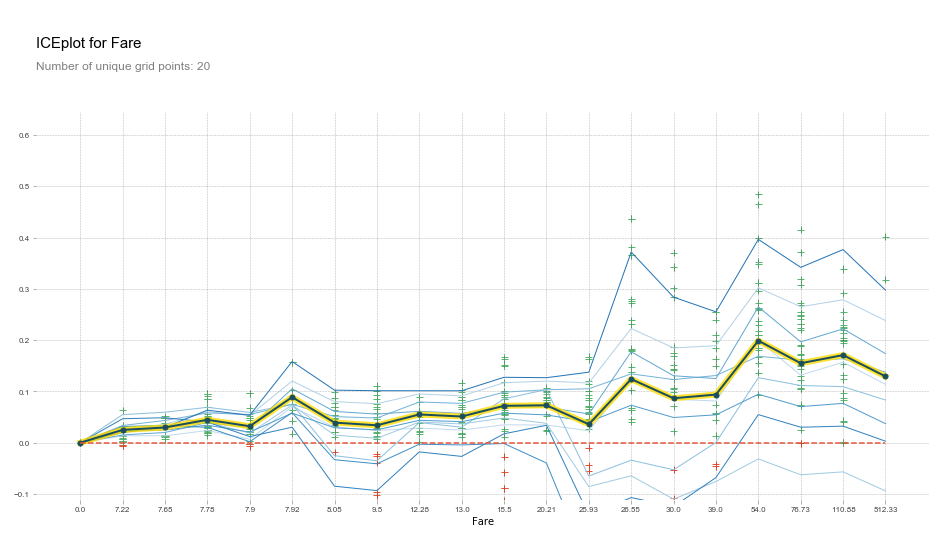

In [38]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True, cluster=True, n_cluster_centers=10)

#### try to choose a reasonable percentile range

In [39]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20, percentile_range=(5, 95))

#### when trying out plot out the original points with customized percentile range
you can find some original points are actually excluded from the customized percentile range

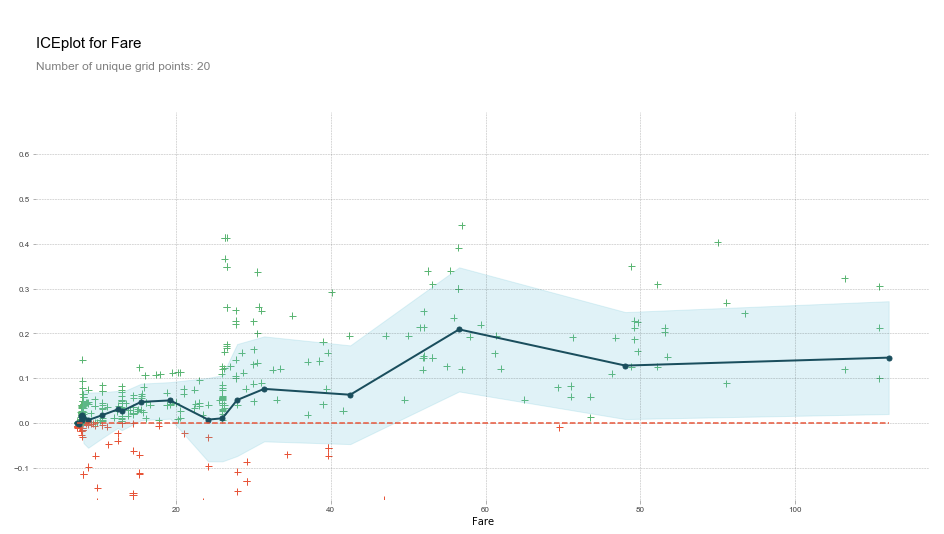

In [40]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### sure you can set x_quantile=True if you find the plot above uncomfortable

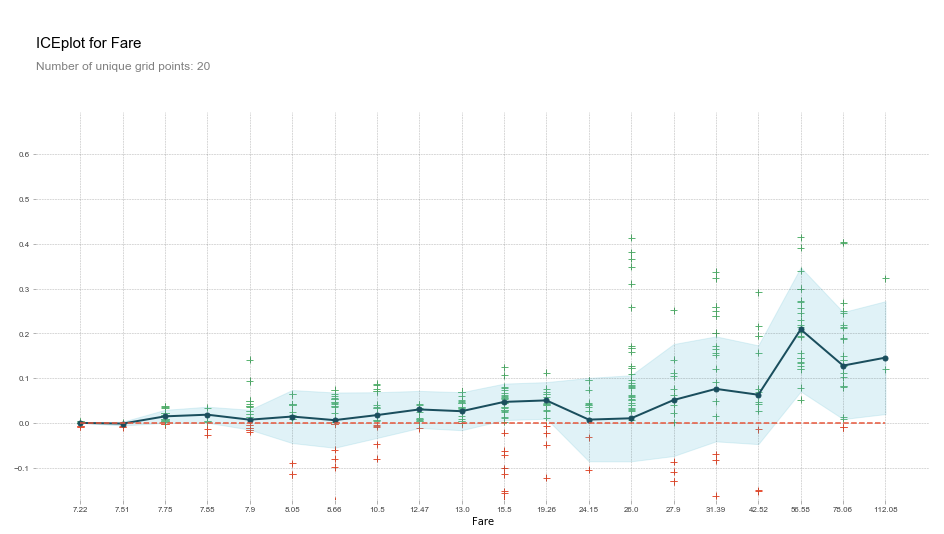

In [41]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True)

#### try to set center=False

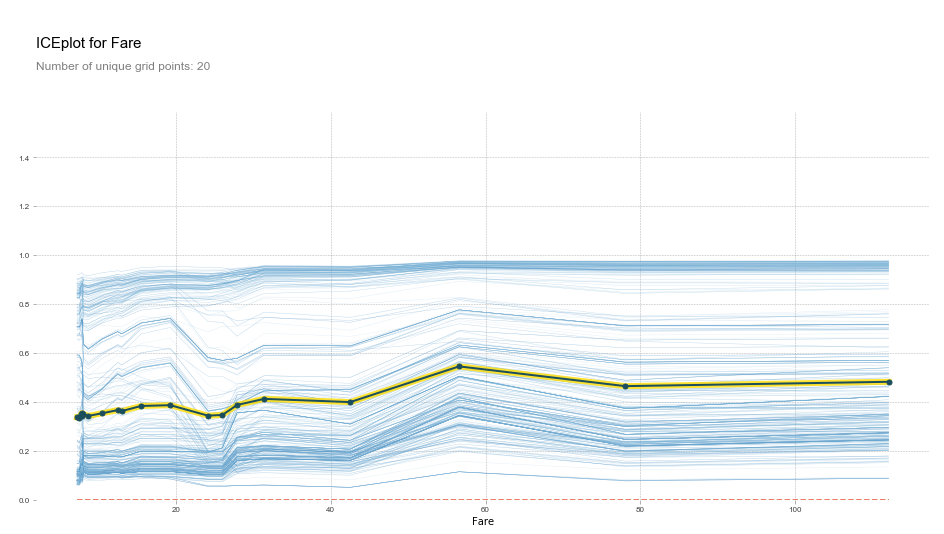

In [42]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

#### try to customized the grid points

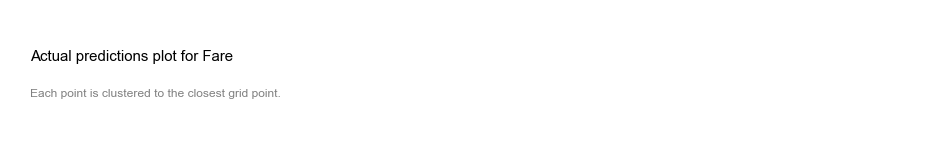

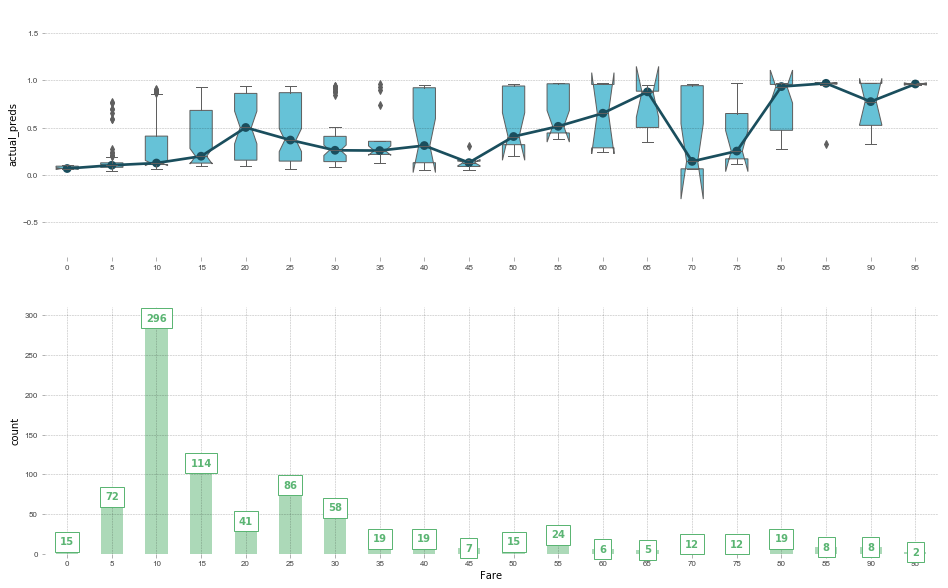

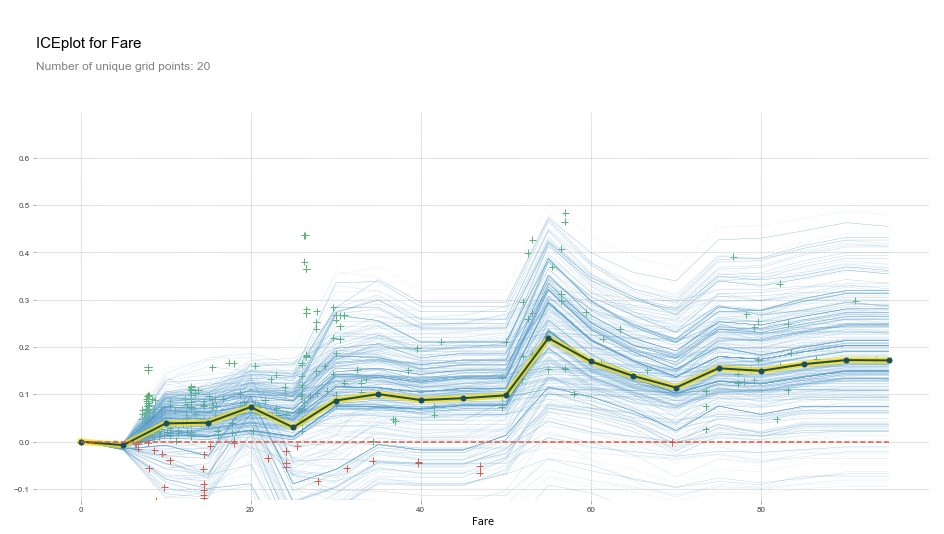

In [43]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', cust_grid_points=range(0, 100, 5))
pdp.actual_plot(pdp_fare, 'Fare')
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

In [44]:
inter1 = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

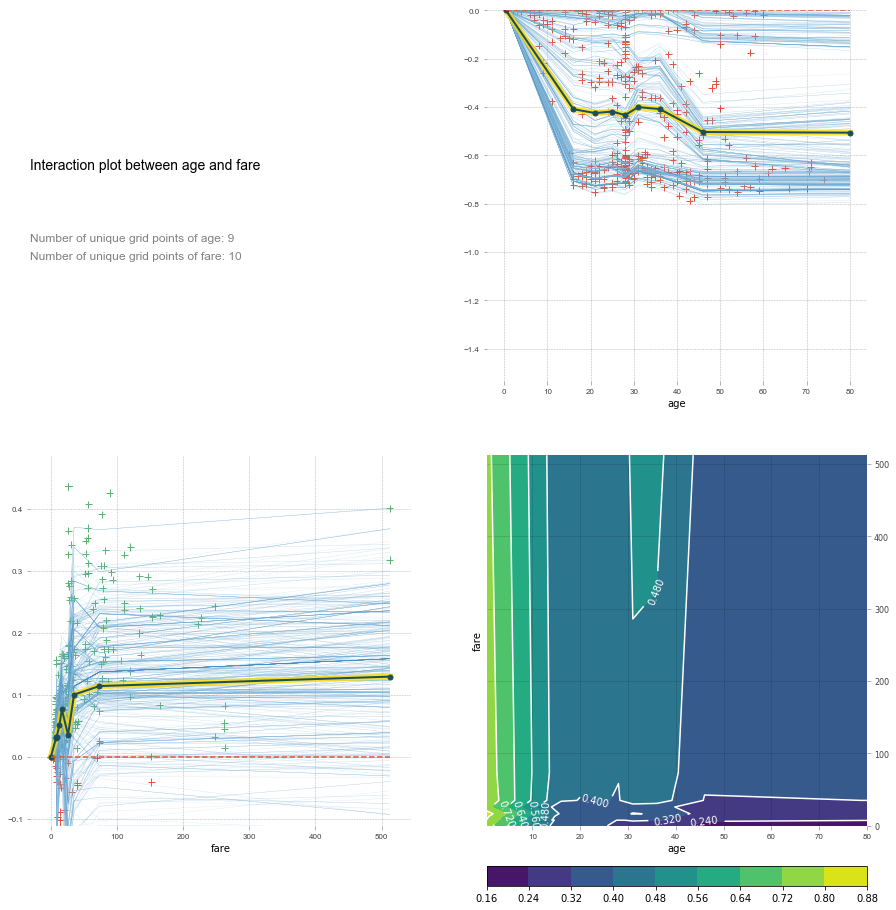

In [45]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### it is better to set x_quantile=True

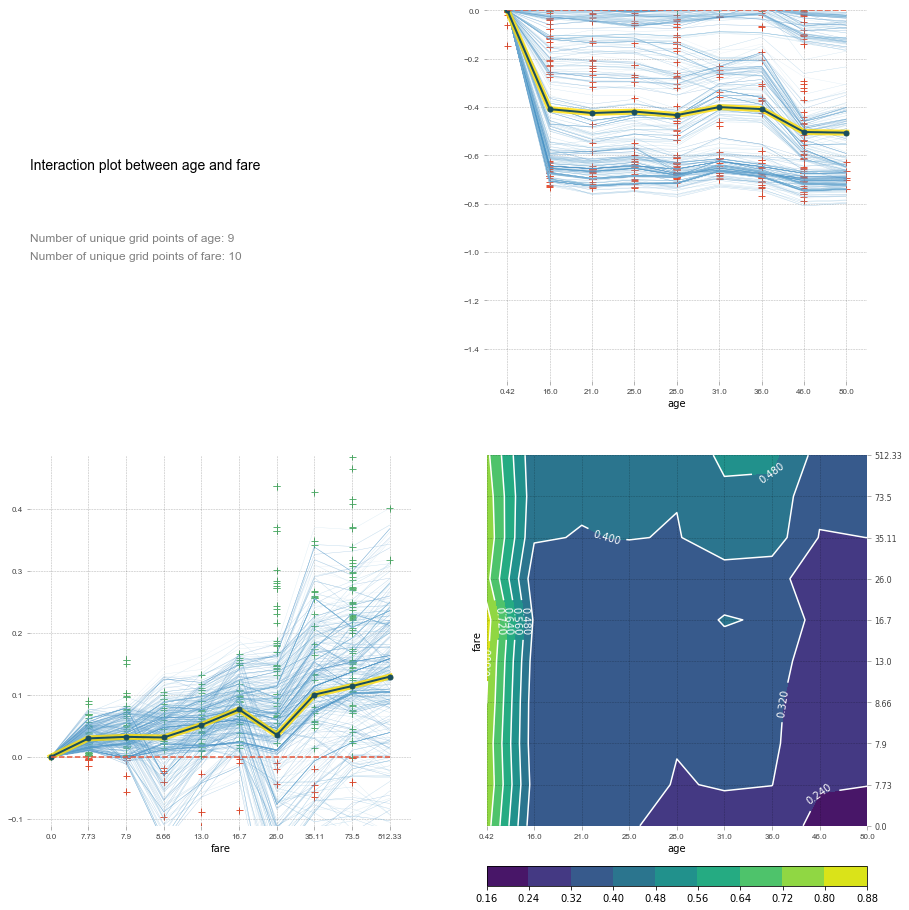

In [46]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

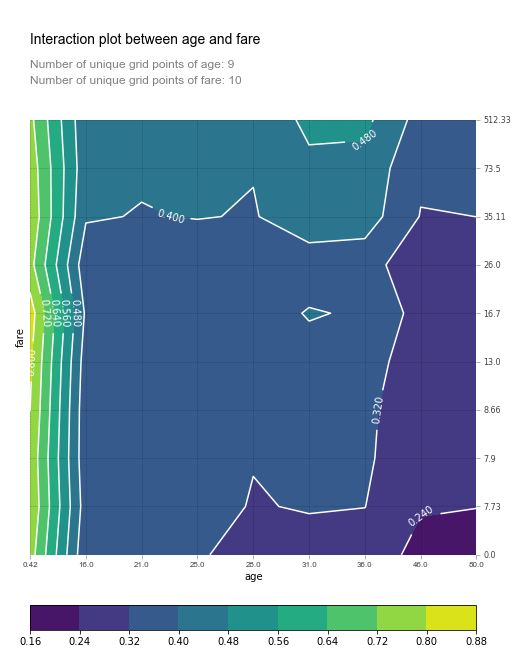

In [47]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)